<a href="https://colab.research.google.com/github/jcjimenezb123/ProgramacionPython/blob/master/Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import networkx as nx
import matplotlib.pyplot as plt


In [19]:
# The following line initializes two empty directed graph objects
G1=nx.DiGraph()
# An empty undirected graph object can be initialized using the command
# G=nx.Graph()

In [7]:
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)
G1.add_node(4)
G1.add_node(5)
G1.add_node(6)
G1.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [31]:
G1.add_edge(1, 2, weight = 2.0)
G1.add_edge(1, 3, weight = 4.0)
G1.add_edge(2, 3, weight = 1.0)
G1.add_edge(2, 4, weight = 4.0)
G1.add_edge(2, 5, weight = 2.0)
G1.add_edge(3, 5, weight = 3.0)
G1.add_edge(4, 6, weight = 2.0)
G1.add_edge(5, 4, weight = 3.0)
G1.add_edge(5, 6, weight = 2.0)
G1.edges()

OutEdgeView([(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 6), (5, 4), (5, 6)])

In [20]:
list_nodes = [1, 2, 3, 4, 5, 6]
G1.add_nodes_from(list_nodes)
G1.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [21]:
list_arcs = [(1,2,2.0) , (1,3,4.0) , (2,3,1.0) , (2,4,4.0) , (2,5,2.0) , (3,5,3.0) , (4,6,2.0) , (5,4,3.0) , (5,6,2.0)]
G1.add_weighted_edges_from(list_arcs)
G1.edges()

OutEdgeView([(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 6), (5, 4), (5, 6)])

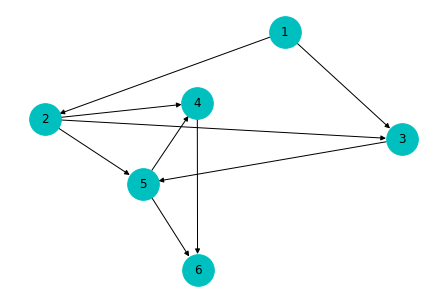

In [57]:
nx.draw(G1,with_labels=1,node_color='c',node_size=1000)

In [22]:
sp = nx.dijkstra_path(G1,source = 1, target = 6)
print(sp)

[1, 2, 5, 6]


In [23]:
print(nx.shortest_path(G1,source = 1, target = 6))

[1, 2, 4, 6]


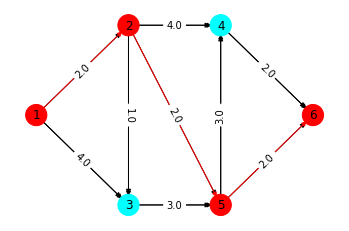

In [58]:
# First we import the matplotlib python plotting package
import matplotlib.pyplot as plt
# We then set the coordinates of each node
G1.nodes[1]['pos'] = (0,0)
G1.nodes[2]['pos'] = (1,1)
G1.nodes[3]['pos'] = (1,-1)
G1.nodes[4]['pos'] = (2,1)
G1.nodes[5]['pos'] = (2,-1)
G1.nodes[6]['pos'] = (3,0)
# The positions of each node are stored in a dictionary
node_pos=nx.get_node_attributes(G1,'pos')
# The edge weights of each arcs are stored in a dictionary
arc_weight=nx.get_edge_attributes(G1,'weight')
# Create a list of arcs in the shortest path using the zip command and store it in red edges
red_edges = list(zip(sp,sp[1:]))
# If the node is in the shortest path, set it to red, else set it to white color
node_col = ['cyan' if not node in sp else 'red' for node in G1.nodes()]
# If the edge is in the shortest path set it to red, else set it to white color
edge_col = ['black' if not edge in red_edges else 'red' for edge in G1.edges()]
# Draw the nodes
nx.draw_networkx(G1, node_pos,node_color= node_col, node_size=450)
# Draw the node labels
# nx.draw_networkx_labels(G1, node_pos,node_color= node_col)
# Draw the edges
nx.draw_networkx_edges(G1, node_pos,edge_color= edge_col)
# Draw the edge labels
nx.draw_networkx_edge_labels(G1, node_pos, edge_labels=arc_weight)
# Remove the axis
plt.axis('off')
# Show the plot
plt.show()

In [26]:
import pandas as pd
df=pd.read_csv('metro.csv')
df.head()

,Desde,Hasta,Distancia
0,Pantitlán,Zaragoza,1320
1,Zaragoza,Gómez Farías,762
2,Gómez Farías,Boulevard Puerto Aéreo,611
3,Boulevard Puerto Aéreo,Balbuena,595
4,Balbuena,Moctezuma,703


In [27]:
G=nx.from_pandas_edgelist(df, 'Desde', 'Hasta', 'Distancia')
G.nodes()

NodeView(('Pantitlán', 'Zaragoza', 'Gómez Farías', 'Boulevard Puerto Aéreo', 'Balbuena', 'Moctezuma', 'San Lázaro', 'Candelaria', 'Merced', 'Pino Suárez', 'Isabel la Católica', 'Salto del Agua', 'Balderas', 'Cuauhtémoc', 'Insurgentes', 'Sevilla', 'Chapultepec', 'Juanacatlán', 'Tacubaya', 'Observatorio', 'Cuatro Caminos', 'Panteones', 'Tacuba', 'Cuitláhuac', 'Popotla', 'Colegio Militar', 'Normal', 'San Cosme', 'Revolución', 'Hidalgo', 'Bellas Artes', 'Allende', 'Zócalo', 'San Antonio Abad', 'Chabacano', 'Viaducto', 'Xola', 'Villa de Cortés', 'Nativitas', 'Portales', 'Ermita', 'General Anaya', 'Tasqueña', 'Indios Verdes', 'Deportivo 18 de Marzo', 'Potrero', 'La Raza', 'Tlatelolco', 'Guerrero', 'Juárez', 'Niños Héroes', 'Hospital General', 'Centro Médico', 'Etiopía/Plaza de la Transparencia', 'Eugenia', 'División del norte', 'División del Norte', 'Zapata', 'Coyoacán', 'Viveros/Derechos Humanos', 'Miguel Ángel de Quevedo', 'Copilco', 'Universidad', 'Santa Anita', 'Jamaica', 'Fray Servando'

In [35]:
G.edges()

EdgeView([('Pantitlán', 'Zaragoza'), ('Pantitlán', 'Hangares'), ('Pantitlán', 'Puebla'), ('Pantitlán', 'Agrícola Oriental'), ('Zaragoza', 'Gómez Farías'), ('Gómez Farías', 'Boulevard Puerto Aéreo'), ('Boulevard Puerto Aéreo', 'Balbuena'), ('Balbuena', 'Moctezuma'), ('Moctezuma', 'San Lázaro'), ('San Lázaro', 'Candelaria'), ('San Lázaro', 'Ricardo Flores Magón'), ('San Lázaro', 'Morelos'), ('Candelaria', 'Merced'), ('Candelaria', 'Fray Servando'), ('Candelaria', 'Morelos'), ('Merced', 'Pino Suárez'), ('Pino Suárez', 'Isabel la Católica'), ('Pino Suárez', 'Zócalo'), ('Pino Suárez', 'San Antonio Abad'), ('Isabel la Católica', 'Salto del Agua'), ('Salto del Agua', 'Balderas'), ('Salto del Agua', 'San Juan de Letrán'), ('Salto del Agua', 'Doctores'), ('Balderas', 'Cuauhtémoc'), ('Balderas', 'Juárez'), ('Balderas', 'Niños Héroes'), ('Cuauhtémoc', 'Insurgentes'), ('Insurgentes', 'Sevilla'), ('Sevilla', 'Chapultepec'), ('Chapultepec', 'Juanacatlán'), ('Juanacatlán', 'Tacubaya'), ('Tacubaya', '

In [36]:
G.order()

164

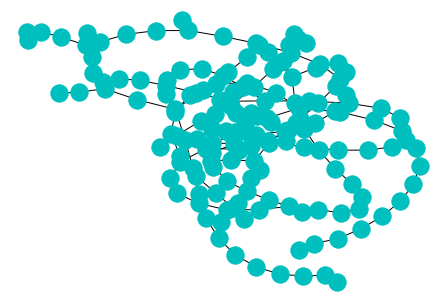

In [32]:
nx.draw(G,with_labels=0,node_color='c')

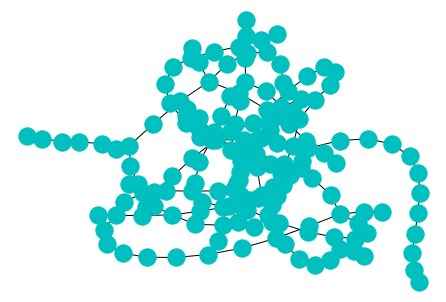

In [59]:
nx.draw_spring(G,with_labels=0,node_color='c')

In [33]:
G['Pantitlán']['Zaragoza']['Distancia']

1320

In [34]:
G['Balbuena']['Moctezuma']['Distancia']

703

In [45]:
sp = nx.dijkstra_path(G,source = 'San Lázaro', target = 'Martín Carrera')
print(sp)

['San Lázaro', 'Morelos', 'Canal del Norte', 'Consulado', 'Bondojito', 'Talismán', 'Martín Carrera']


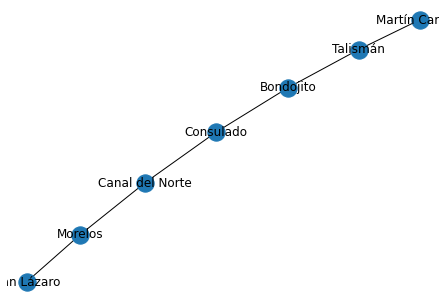

In [46]:
ruta=G.subgraph(sp)
nx.draw(ruta,with_labels=1)

In [65]:
total=0
for i in range(len(sp)-1):
  nodo1=sp[i]
  nodo2=sp[i+1]
  total+=G[nodo1][nodo2]['Distancia']
print('Distancia recorrida %s m' % (total))

Distancia recorrida 5823 m


In [60]:
sp = nx.astar_path(G,source = 'San Lázaro', target = 'Martín Carrera')
print(sp)

['San Lázaro', 'Morelos', 'Canal del Norte', 'Consulado', 'Bondojito', 'Talismán', 'Martín Carrera']
